# Sales Prediction
## ( Simple Linear Regression)

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
import os

os.chdir('G:\My Drive\Prep\Prep\Linear Regression Proj 1')

In [14]:
# advertising=pd.read_csv("advertising.csv")
# advertising

In [15]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [16]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [27]:
def count_tv_above_150(advertising):
    """
    Counts the number of TV advertisements with a budget greater than 150.

    Parameters:
    - advertising: DataFrame containing advertising data

    Returns:
    - count: Number of TV advertisements with a budget greater than 150
    """
    count = advertising[advertising['TV'] > 150]['TV'].count()
    return count

count_tv_above_150(advertising)

99

In [22]:
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

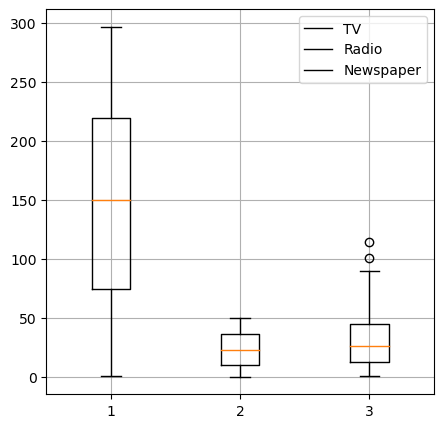

In [42]:
# # Outlier Analysis
plt.figure(figsize=(5, 5))
plt.boxplot(advertising.drop('Sales', axis=1))
plt.legend(advertising.drop('Sales', axis=1).columns)
plt.grid()
plt.show()

In [43]:
# # Outlier Analysis
# fig, axs = plt.subplots(3, figsize = (5,5))
# plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
# plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
# plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
# plt.tight_layout()

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

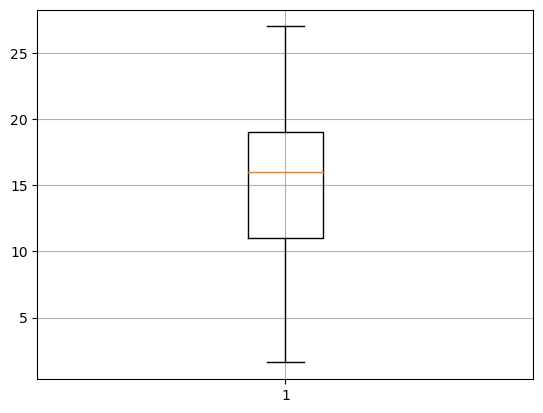

In [48]:
plt.boxplot(advertising['Sales'])
plt.grid()
plt.show()

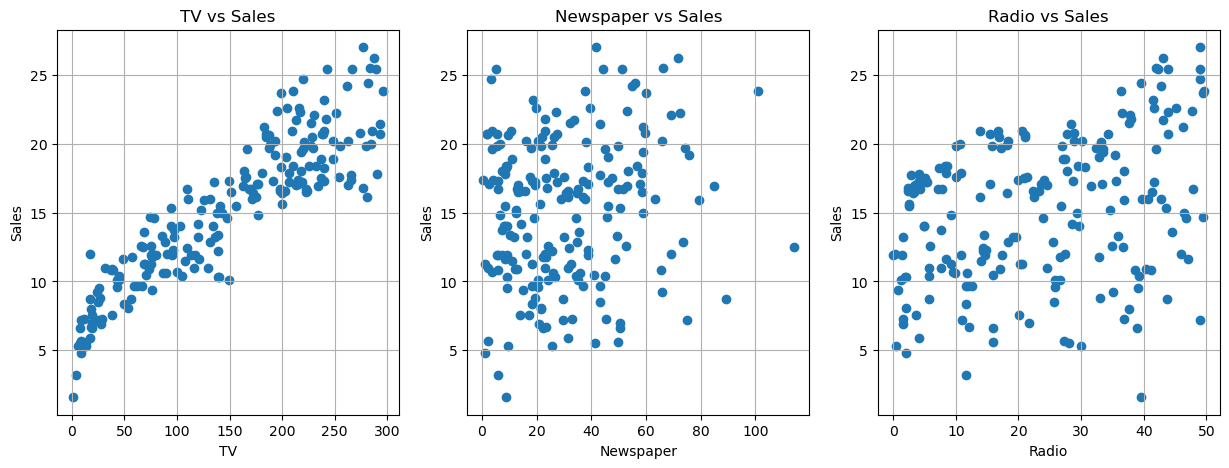

In [69]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(advertising['TV'], advertising['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid()

plt.subplot(1, 3, 2)
plt.scatter(advertising['Newspaper'], advertising['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.grid()

plt.subplot(1, 3, 3)
plt.scatter(advertising['Radio'], advertising['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.grid()
plt.show()


In [70]:
# # Let's see how Sales are related with other variables using scatter plot.
# sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
# plt.show()

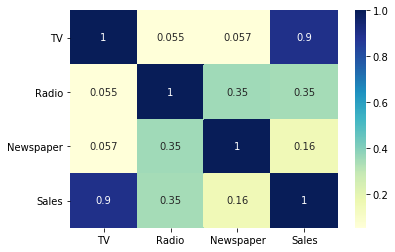

In [11]:
# # Let's see the correlation between different variables.
# sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
# plt.show()

<Axes: >

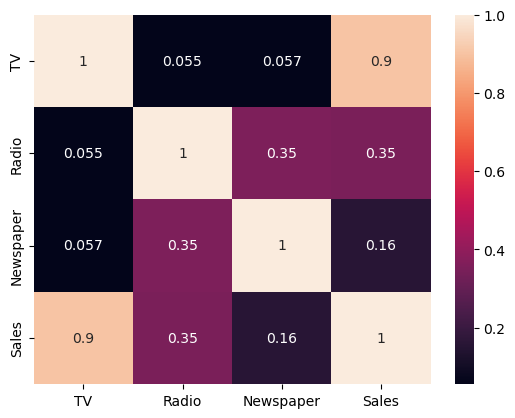

In [74]:
sns.heatmap(advertising.corr(), annot = True)

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [75]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 40)

In [77]:
# Let's now take a look at the train dataset
X_train.head()

188    286.0
170     50.0
107     90.4
65      69.0
109    255.4
Name: TV, dtype: float64

In [78]:
y_train.head()

188    20.9
170     8.4
107    12.0
65     11.3
109    19.8
Name: Sales, dtype: float64

### Building a Linear Model

### Using Sklearn new we will predic the sales using TV as a feature

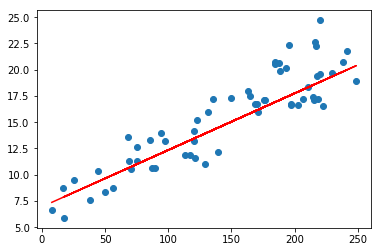

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [105]:
X_train.values.reshape(-1, 1).shape

(140, 1)

In [106]:
y_train.values.shape

(140,)

In [107]:
model_1.fit(X_train.values.reshape(-1, 1), y_train.values)
y_pred_val=model_1.predict(X_test.values.reshape(-1, 1))
model_1.coef_, model_1.intercept_

(array([0.0553833]), 6.997598778194721)

In [115]:
y_pred_val

array([17.94133908,  7.4794335 , 14.70695429, 23.09752441, 22.92583618,
       16.55121822, 21.54679198,  9.04124259, 14.43557612, 11.17903801,
       17.23797115, 19.20961667, 16.42383663, 14.91187251, 13.07868524,
       11.06273308, 16.10815181, 19.64160642,  7.46281851, 11.13473137,
       13.69897821, 20.77696409, 17.69765255, 20.89326902, 19.31484494,
        7.93357657, 10.83012321, 14.634956  ,  8.03880484,  7.03636709,
       21.70740355, 11.96548089, 18.92716184, 22.74307128, 18.88839352,
        7.98895987, 20.27851438, 20.38374265, 14.71249262, 20.46681761,
       11.22334465, 10.1101403 , 19.00469846, 11.82702263, 23.25813598,
       13.67128656, 20.25082273, 17.39858273, 18.66686032,  9.10216422,
       22.33323485, 10.44797844, 12.79069207, 14.25834955, 12.21470574,
       18.21271725, 16.72844478, 18.98254514, 14.76787592,  8.41541129])

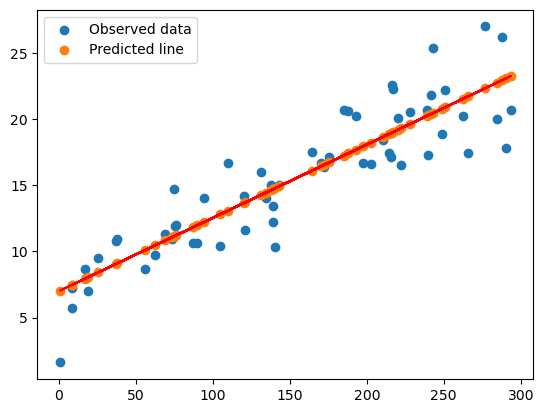

In [114]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_val)
plt.plot(X_test, 6.997598778194721 + 0.0553833* X_test, 'r')
plt.legend(['Observed data','Predicted line'])

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred_val))

2.3431574168506124

In [119]:
import pickle as pkl

pkl.dump(model_1, open('model_1.pkl', 'wb'))

In [124]:
# make a test request using the requests library
import requests
import json

# make a test request
url = 'http://127.0.0.1:5000/predict'
json_1 = {'TV': 50}
data = json.dumps(json_1)
response = requests.post(url, data)
print(response.json())

9.766763833321114
